### Import moduls

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [4]:
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

In [5]:
train = pd.read_pickle('data/2022-03-30_train_preprocessed.pkl.zip', compression='zip')
test = pd.read_pickle('data/2022-03-30_test_preprocessed.pkl.zip', compression='zip')

### DataBase description:

- body_type - Type of vehicle body  
- brand - Manufacture name  
- color - Main car's bodt color  
- description - Seller's car description  
- engine_displacement - Volume of car's engine  
- engine_power - Engine power in horse powers  
- fuel_type - Fuel type  
- km_age - Vehicle mileage  
- model_date - Date when model production was started  
- number_of_doors - Number of doors  
- production_date - Production date of this car  
- vehicle_transmission - Transmission type  
- vendor - Origin country of brand  
- oweners - Count of oweners of car  
- having_time - Time ot owenership of vehicle  
- ptc - Vehicle Registration Certificate  
- drive - Car drive  
- wheel - Wheel position in car  
- price - Our target column - Car Price  

### Dicts and Lists block

In [6]:
valid_columns_dict = {
    'bodyType': 'body_type', 
    'engineDisplacement': 'engine_displacement', 
    'enginePower': 'engine_power',
    'fuelType': 'fuel_type',
    'mileage': 'km_age',
    'modelDate': 'model_date',
    'numberOfDoors': 'number_of_doors',
    'productionDate': 'production_date',
    'vehicleTransmission': 'vehicle_transmission',
    'Владельцы': 'oweners', 
    'Владение': 'having_time', 
    'ПТС': 'ptc', 
    'Привод': 'drive', 
    'Руль': 'wheel'
    }

In [30]:
def get_nans_in_percents(df):
    nans = df.isna().sum() / df.shape[0] * 100
    return nans[nans > 0]

### Changing columns names to english and snake-type (from dict)

In [7]:
train.rename(columns=valid_columns_dict, inplace=True)
test.rename(columns=valid_columns_dict, inplace=True)

### Separate to categorical and numeric columns

In [1]:
cat_cols = [
    'body_type', 'brand', 'color', 'fuel_type', 'number_of_doors', 'vehicle_transmission', 
    'vendor', 'oweners', 'having_time', 'ptc', 'drive', 'wheel'
    ]
nums_cols = [
    'engine_displacement', 'engine_power', 'km_age', 'model_date', 'production_date', 'having_time', 'price'
    ]

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121420 entries, 0 to 89377
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   body_type             121418 non-null  object 
 1   brand                 121420 non-null  object 
 2   color                 121420 non-null  object 
 3   description           118208 non-null  object 
 4   engine_displacement   121345 non-null  object 
 5   engine_power          121418 non-null  float64
 6   fuel_type             121419 non-null  object 
 7   km_age                115643 non-null  float64
 8   model_date            121418 non-null  float32
 9   number_of_doors       121418 non-null  float32
 10  production_date       121420 non-null  float32
 11  vehicle_transmission  121418 non-null  object 
 12  vendor                121420 non-null  object 
 13  oweners               105108 non-null  float32
 14  having_time           34929 non-null   float64
 15  p

#### Let's see percentage of nan's by columns

In [31]:
get_nans_in_percents(train)

body_type                0.001647
description              2.645363
engine_displacement      0.061769
engine_power             0.001647
fuel_type                0.000824
km_age                   4.757865
model_date               0.001647
number_of_doors          0.001647
vehicle_transmission     0.001647
oweners                 13.434360
having_time             71.232911
ptc                      5.044474
drive                    4.759512
wheel                    4.758689
dtype: float64

In [32]:
get_nans_in_percents(test)

engine_displacement     0.158565
having_time            65.418324
ptc                     0.002883
dtype: float64

#### Lookout on missed values

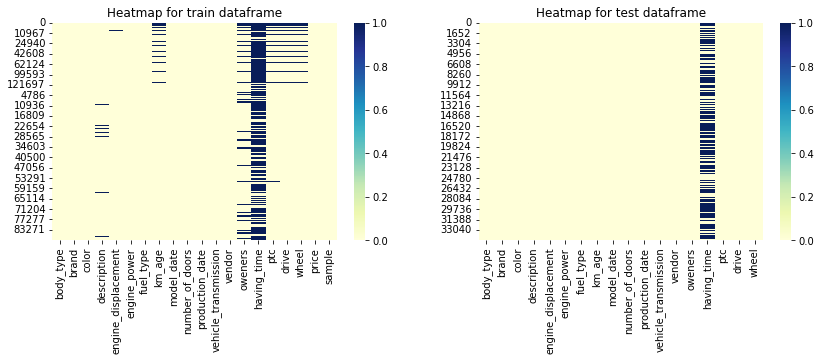

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
sns.heatmap(train.isna(), cmap='YlGnBu', ax=ax[0]).set_title('Heatmap for train dataframe')
sns.heatmap(test.isna(), cmap='YlGnBu', ax=ax[1]).set_title('Heatmap for test dataframe')
plt.show()